In [1]:
! pip install -q kaggle

### if kaggle folder isn't present run the below code

In [3]:
# ! mkdir ~/.kaggle 

In [4]:
! cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

  0%|                                               | 0.00/8.56k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.56k/8.56k [00:00<00:00, 2.40MB/s]


In [6]:
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [7]:
rm -r heart-failure-prediction.zip

In [8]:
ls

heart.csv*  notebook.ipynb*


# 1. DATASET

## 1.1 Data Description
<p> This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for reasearch purposes. The five datasets used for its curation are:
    <ul>
        <li>Cleveland: 303 observations</li>
        <li>Hungarian: 294 observations</li>
        <li>Switzerland: 123 observations</li>
        <li>Long Beach VA: 200 observations</li>
        <li>Stalog (Heart) Data Set: 270 observations</li>
        
</ul>
</p>



Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations
    

## 1.2 Attribute Information
<ul>
    <li><b>Age</b>: age of the patient [years]</li>
     <li><b>Sex</b>: sex of the patient [M: Male, F: Female]</li>
     <li><b>ChestPainType</b>: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
     <li><b>RestingBP</b>: resting blood pressure [mm Hg]</li>
     <li><b>Cholesterol</b>: serum cholesterol [mm/dl]</li>
     <li><b>FastingBS</b>: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
     <li><b>RestingECG</b>: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
     <li><b>MaxHR</b>: maximum heart rate achieved [Numeric value between 60 and 202]</li>
     <li><b>ExerciseAngina</b>: exercise-induced angina [Y: Yes, N: No]</li>
     <li><b>Oldpeak</b>: oldpeak = ST [Numeric value measured in depression]</li>
     <li><b>ST_Slope</b>: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
     <li><b>HeartDisease</b>: output class [1: heart disease, 0: Normal]</li>
</ul>
  


# 2. First Glance into the data

## 2.1 Necessary imports 

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, mutual_info_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
# from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
# from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge

# import xgboost as xgb

In [16]:
df = pd.read_csv("heart.csv")
df.head().T

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


# 3. EDA

## 3.1 Data Info

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 3.2 Check missing values

In [18]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 3.3 Change the 'Target' feature into binary (if it isn't already)
<p> here, the dataset is already divided into 1's and zeros's</p>
<li>1: For Heart Disease</li>
<li>0: For Normal (no Heart Disease) </li>

In [19]:
df['HeartDisease'].nunique()

2

## 3.4 Check if the data is balanced or not 

In [20]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Text(0.5, 1.0, 'Target Classification')

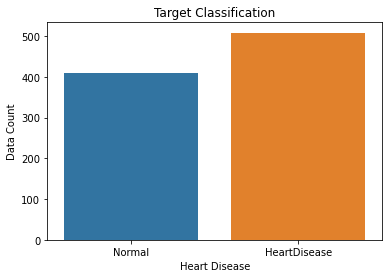

In [21]:
sns.countplot(df['HeartDisease']).set(ylabel= "Data Count", xlabel="Heart Disease")
plt.xticks(ticks=[0,1],labels =["Normal", "HeartDisease"])
plt.title("Target Classification")

### It seems the data isn't quite balanced. So, let's try to do so 

### 3.4.1 Balancing the dataset

There are 2 ways of resampling:

1. Random Oversampling: Randomly duplicate examples in the minority class
2. Random Undersampling: Randomly delete examples in the majority class

Random Oversampling seems like the better approach here as we already have fewer data to work with and seems the right way

In [22]:
df_copy = df.copy()

In [23]:
df_copy['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [24]:
count_class_1, count_class_0 = df_copy['HeartDisease'].value_counts()

# Divide by class
df_copy_0 = df_copy[df_copy['HeartDisease'] == 0]
df_copy_1 = df_copy[df_copy['HeartDisease'] == 1]

In [25]:
# df.sample?

In [26]:
count_class_0, count_class_1

(410, 508)

In [27]:
len(df_copy_0), len(df_copy_1)

(410, 508)

In [28]:
df_copy_0_more = df_copy_0.sample(count_class_1, replace=True)
df_copy_0_more.nunique().sum()

356

In [29]:
df_copy_new = pd.concat([df_copy_1, df_copy_0_more], axis=0)

In [30]:
df_copy_0.nunique().sum()

402

Text(0.5, 1.0, 'Target Classification')

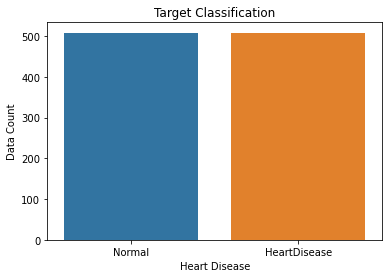

In [31]:
sns.countplot(df_copy_new['HeartDisease']).set(ylabel= "Data Count", xlabel="Heart Disease")
plt.xticks(ticks=[0,1],labels =["Normal", "HeartDisease"])
plt.title("Target Classification")

## 3.5 Look and Separate the features into numerical and categorical 

In [32]:
num_cols = list(df.dtypes[df.dtypes != object].index)
num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [33]:
num_cols.remove('HeartDisease')
num_cols

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [34]:
cat_cols = list(df.dtypes[df.dtypes == object].index)
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

## 3.6 Check uniques values in categorical features 

In [35]:
df_copy[cat_cols].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

## 3.7 Numerical data description

In [36]:
df_copy_new[num_cols].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,53.315945,132.111220,201.692913,0.215551,137.467520,0.851083
std,9.313351,18.317249,108.424218,0.411407,25.251502,1.040357
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,179.500000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,139.000000,0.500000
75%,60.000000,140.000000,270.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000


## 3.8 Visualize the numerical features 

In [37]:
df_copy[num_cols].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


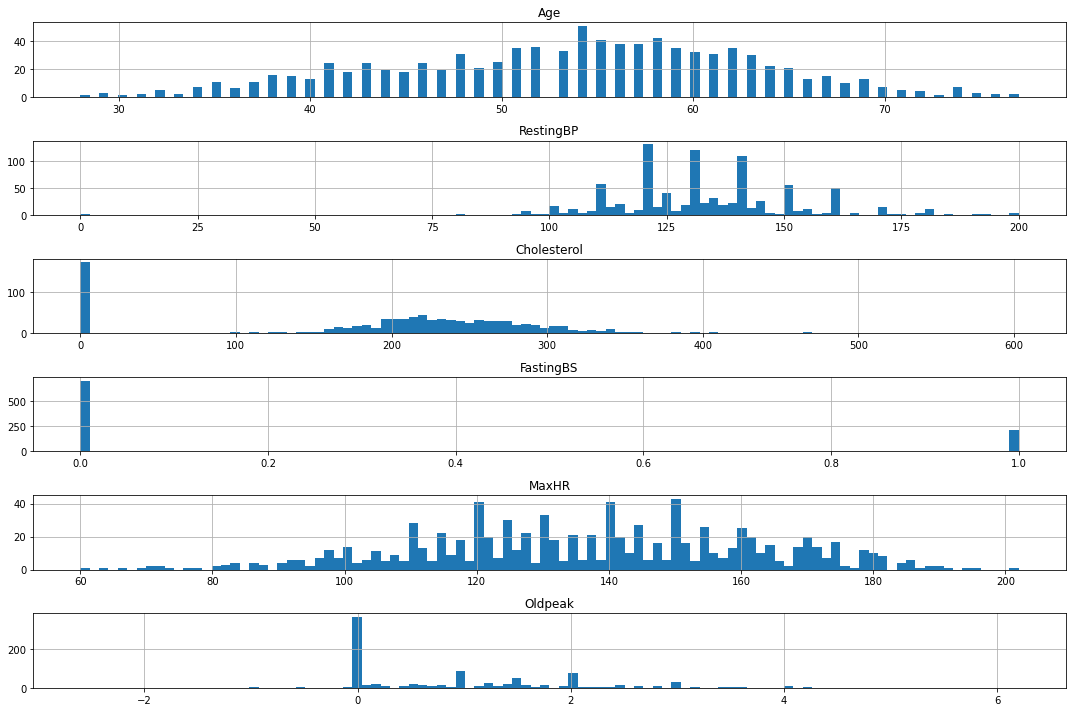

In [38]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df_copy.hist(bins=100, ax=ax, layout=(6,1),
            column = num_cols
            )
plt.tight_layout()
plt.show()

# 4. Split Dataset Train/Val/Test

In [39]:
data = df_copy_new.copy()

#### let's not drop duplicates 

In [40]:
# print(f"shape before dropping duplicates: {data.shape}")
# data = data.drop_duplicates(keep="first")
# print(f"shape after dropping duplicates: {data.shape}")

In [41]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=20)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=20)

y_train = df_train.HeartDisease.values
y_val = df_val.HeartDisease.values
y_test = df_test.HeartDisease.values

In [42]:
print(f"Train_full: {len(df_full_train)}  {round(len(df_full_train)/ len(data), 2)}")
print(f"Train_: {len(df_train)}  {round(len(df_train)/ len(data), 2)}")
print(f"Test: {len(df_test)}  {round(len(df_test)/ len(data), 2)}")
print(f"Val: {len(df_val)}  {round(len(df_val)/ len(data), 2)}")

Train_full: 812  0.8
Train_: 609  0.6
Test: 204  0.2
Val: 203  0.2


In [43]:
df_train.HeartDisease.values[:4]

array([0, 0, 1, 0])

# 5. Feature Importance

## 5.1 Heatmap

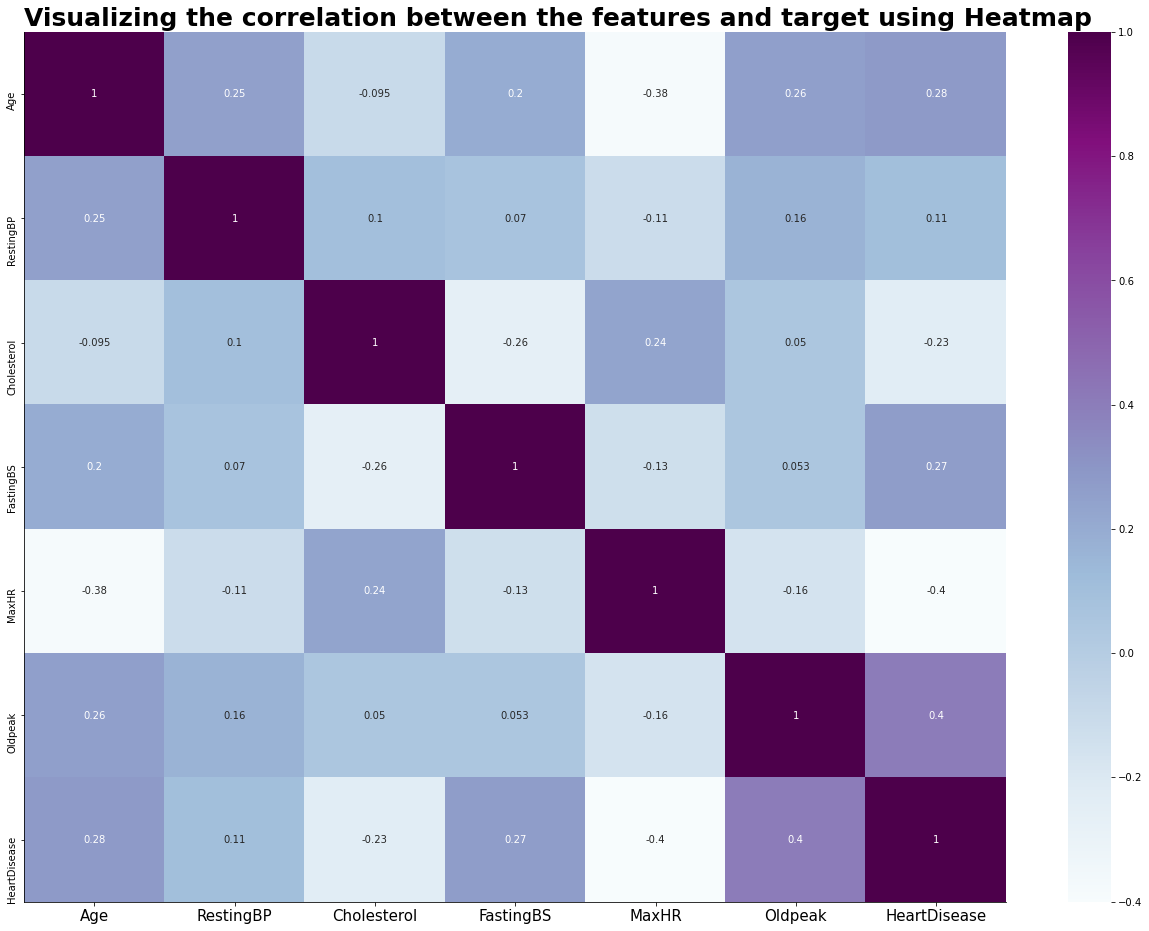

In [44]:
plt.figure(figsize =(22,16))
sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Visualizing the correlation between the features and target using Heatmap", fontdict = {'fontsize': 25, 'fontweight': 'bold'}, loc='left')
sns.despine()
plt.show()

## 5.2 Mutual info score for categorical features

In [53]:
def mutual_info_target_score(series):
    return mutual_info_score(series, df_full_train.HeartDisease)

In [54]:
df_full_train[cat_cols].apply(mutual_info_target_score)

Sex               0.048509
ChestPainType     0.167542
RestingECG        0.001139
ExerciseAngina    0.144341
ST_Slope          0.193763
dtype: float64

# 6. BUILD MODELS

In [55]:
data = df.copy()

In [56]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=20)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=20)

y_train = df_train.HeartDisease.values
y_val = df_val.HeartDisease.values
y_test = df_test.HeartDisease.values

In [57]:
df_train.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [58]:
df_train = df_train.drop("HeartDisease", axis=1)
df_val = df_val.drop("HeartDisease", axis=1)
df_test = df_test.drop("HeartDisease", axis=1)

In [59]:
df_val.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [60]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient="records")
X_test = dv.transform(test_dict)

In [61]:

X_test.shape

(184, 20)

In [62]:
def run_model(model, print_values = 1, return_predictions = 0, test=False):
    """
    Function that receives a machine learning model and returns its metrics.
    
    print_values =1: print the results of calculated metrics
    return_predictions=1: return the predictions together with the metrics.
    test=False: we are evaluating over validation dataset
    """
    if not test:
#         print("Here I am")
        y = y_val # y is the actual value
        X = X_val
    else:
#         print("Why am i here")
        y = y_test
        X = X_test
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
#     y_pred = model.predict(X_val)
#     print(y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    if print_values:
        print(f"MAE: {round(mae, 5)}")
        print(f"MSE: {round(mse, 5)}")
        print(f"RMSE: {round(rmse, 5)}")
    if return_predictions:
        return y_pred, mae, mse, rmse
    
    return mae, mse, rmse

In [63]:
df_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
568,38,M,ASY,110,289,0,Normal,105,Y,1.5,Down
412,56,M,ASY,125,0,1,Normal,103,Y,1.0,Flat
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat
703,41,F,ATA,126,306,0,Normal,163,N,0.0,Up
255,53,F,NAP,120,274,0,Normal,130,N,0.0,Up


## 6.0 Dummy Model
: Let's take this as a baseline to check our future models.

In [64]:
dummy = DummyRegressor(strategy = 'mean')

In [65]:
mae_dummy, mse_dummy, rmse_dummy = run_model(dummy, test=True)

MAE: 0.49599
MSE: 0.24877
RMSE: 0.49877


## 6.1 RandomForestRegressor

In [66]:
randomreg = RandomForestRegressor(random_state = 42847)

In [67]:
mae_rfr, mse_rfr, rmse_rfr = run_model(randomreg)

MAE: 0.2219
MSE: 0.11182
RMSE: 0.3344


### Tuning

In [68]:
# folds = KFold(n_split=5, shuffle=True, random_state = 420)

In [69]:
params = {
    'n_estimators': [20,50,100, 150, 200, 250],
    'max_depth': [3,4,5,6,7,8,9,10],
    'max_features': ['auto', 'sqrt', 'log2'],
#     'min_sample_split': [10, 50, 100],
    'bootstrap': [True, False]
}

rfr_search = GridSearchCV(randomreg,
                         params,
                         scoring='neg_root_mean_squared_error',
                         n_jobs= -1,
                         verbose = 1,
                         return_train_score = True,
                         cv = 5)

In [70]:
rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42847),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [71]:
rfr_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 250}

In [72]:
rfr_search.best_score_

-0.32727589092670784

## 6.2 XGBRegressor 

In [ ]:
# !pip install xgboost

In [74]:
from xgboost import XGBRegressor

In [75]:
model = XGBRegressor(n_estimator=100, max_depth=5, objective='reg:squarederror')

In [ ]:
folds = KFold(n_splits=3, shuffle=True, random_state=420)

parameters = {'n_estimators': [150, 200, 250], 
              'max_depth': [4, 5, 6], 
              'learning_rate': [0.1, 0.01],
              'colsample_bytree': [0.5], 
              'subsample': [0.6], 
             'eta': [.3, .2, .1, .05, .01, .005]}

model_xgb = GridSearchCV(model, 
                        param_grid=parameters, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        verbose=0,
                        return_train_score=True, n_jobs=-1)
model_xgb.fit(X_train, y_train)

[16:28:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:35] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:42] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[16:28:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:35] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:40] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[16:28:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:35] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:41] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

[16:28:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:36] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:28:43] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 


[16:30:25] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:31] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:35] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used



[16:30:34] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:37] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:43] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used



[16:30:41] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:48] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:53] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used



[16:30:46] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:50] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:30:58] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used



[16:32:14] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:32:20] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:32:25] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used



[16:32:38] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:32:43] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:32:47] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used



[16:32:49] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:32:54] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:33:00] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used



[16:33:01] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:33:06] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:33:12] WARNING: ../src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used


In [ ]:
model_xgb.best_params_

In [ ]:
model_xgb.best_score_

In [ ]:
model_xgb = XGBRegressor(n_estimators= 150, colsample_bytree=0.5,
     eta=0.3,
     learning_rate= 0.1,
     max_depth= 4,     
     subsample= 0.6)

In [ ]:
mae_xgb, mse_xgb, rmse_xgb = run_model(model_xgb)

## 6.3 LinearRegression 

In [ ]:
linreg = LinearRegression()

In [ ]:
mae_linreg, mse_linreg, rmse_linreg = run_model(linreg)

## 6.4 RidgeRegression 

In [ ]:
ridge = Ridge(random_state = 420)
mae_ridge, mse_ridge, rmse_ridge = run_model(ridge)

### Tuning

In [ ]:
for i in [0.01, 0.01, 0.1, 0.5, 1.0, 10, 100]:
    ridge= Ridge(random_state = 420, alpha = i)
    print(f"alpha = {i}")
    run_model(ridge)
    print("-"*12)

## 6.5 LogisticRegression

In [ ]:
scores = []
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_val = model.predict_proba(X_val)[:,1]
    auc_val = roc_auc_score(y_val, y_pred_val).round(3)
    
    y_pred_train = model.predict_proba(X_train)[:,1]
    auc_train = roc_auc_score(y_train, y_pred_train).round(3)
    
    print('C = %5s | AUC-train = %.3f | AUC-val = %.3f' % (C, auc_train, auc_val))

#### Best For C = 0.001

In [ ]:
model_logr = LogisticRegression(solver='liblinear', C=0.001, max_iter=1000)

In [ ]:
mae_logr, mse_logr, rmse_logr = run_model(model_logr)

# SELECTING THE BEST MODEL

In [ ]:
rmse_linreg, rmse_rfr, rmse_ridge, rmse_xgb, rmse_logr

##### We will select XGBoost 

In [ ]:
model_xgb = XGBRegressor(n_estimators= 150, colsample_bytree=0.5,
     eta=0.3,
     learning_rate= 0.1,
     max_depth= 4,     
     subsample= 0.6)

In [ ]:
model_xgb.fit(X_train, y_train)

In [ ]:
preds = model_xgb.predict(X_test) >= 0.3

In [ ]:
(preds == y_test).mean()

In [ ]:
scores = []
for t in [0.3,0.4,0.5,0.6,0.7,0.8]:
    preds = model_xgb.predict(X_val) >= t
    acc = (preds == y_val).mean()
    scores.append({"threshold": t, "acc": acc})

In [ ]:
scores

### {'threshold': 0.5, 'acc': 0.8967391304347826}, this gives the better model 

In [163]:
df_test.index.values

array([358, 333,  13, 364, 204, 267, 908, 119, 779, 461, 456, 525, 504,
       467, 365, 395, 749, 320, 883, 195,  56, 822, 500, 407, 911, 616,
       803, 747, 292, 575, 708, 584,  58, 795, 389, 116, 887, 285, 589,
       602,  62, 109, 891, 470, 611, 691, 717, 121, 693, 431, 554, 844,
       521, 603, 499, 536, 574,  14, 514, 414, 120,  94, 913,  32, 343,
       604, 214, 712, 127, 445, 279, 202, 732, 150, 680, 520, 487,  90,
       173, 781, 702,  18, 439, 722, 629, 248, 561, 416, 859, 728, 861,
       687, 321, 811, 370,   8, 641, 366, 106, 317, 507, 432, 189, 842,
         7, 180, 296,  20, 156,  59, 350, 660,  10, 726, 912, 312, 377,
       385, 841, 656, 206,  80, 657, 359, 826,  34, 771, 147,  92, 586,
       403,  36, 132, 211, 512, 237, 337, 143, 532, 226, 748, 141, 356,
       117, 346,  46, 434, 409, 631, 342, 452, 253, 307, 387, 553, 606,
       799, 542, 721, 634, 300, 558, 172, 340, 391, 200, 800, 197, 354,
       798, 596, 535, 766, 270, 269, 128, 182, 752,   9, 867, 73

In [164]:
import random

In [165]:
random.choice(df_test.index.values)

197

In [170]:
df_test[df_test.index == 197].to_dict(orient="records")

[{'Age': 42,
  'Sex': 'M',
  'ChestPainType': 'ATA',
  'RestingBP': 150,
  'Cholesterol': 268,
  'FastingBS': 0,
  'RestingECG': 'Normal',
  'MaxHR': 136,
  'ExerciseAngina': 'N',
  'Oldpeak': 0.0,
  'ST_Slope': 'Up'}]

In [178]:
test_data = df_test[df_test.index == 197]
test_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
197,42,M,ATA,150,268,0,Normal,136,N,0.0,Up


In [181]:
df[df.index == 197]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
197,42,M,ATA,150,268,0,Normal,136,N,0.0,Up,0


# CHECKING FROM THE DOCKER CONTAINER FRPM WEB HEROKU 

In [5]:
import requests`

In [7]:
url = 'https://ml-zoomcamp-cap-2-docker.herokuapp.com/predict'

In [8]:
data = {'Age': 42,
  'Sex': 'M',
  'ChestPainType': 'ATA',
  'RestingBP': 150,
  'Cholesterol': 268,
  'FastingBS': 0,
  'RestingECG': 'Normal',
  'MaxHR': 136,
  'ExerciseAngina': 'N',
  'Oldpeak': 0.0,
  'ST_Slope': 'Up'}

In [9]:
requests.post(url, json=data).json()

{'Heart Disease': False}